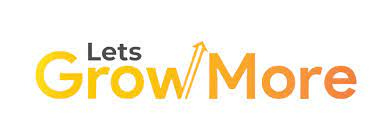






 <b>TASK 3} Music Recommendation System || September 2021 || Data Science Internship
   <br><br> Author</b>- Aayushi Dighe 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from typing import List, Dict

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
songs = pd.read_csv(r"C:\Users\Hp\Downloads\song_data.csv")
users = pd.read_csv(r"C:\Users\Hp\Downloads\millionsong.csv")

In [5]:
songs.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003.0
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteill??,Karkkiautomaatti,1995.0
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006.0
3,SOBNYVR12A8C13558C,Si Vos Quer??s,De Culo,Yerba Brava,2003.0
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0.0


In [6]:
users.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5


In [7]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   song_id      999999 non-null   object 
 1   title        999986 non-null   object 
 2   release      999995 non-null   object 
 3   artist_name  1000000 non-null  object 
 4   year         1000000 non-null  float64
dtypes: float64(1), object(4)
memory usage: 38.1+ MB


In [8]:
songs.describe()

,year
count,1000000.000000
mean,1030.325652
std,998.745002
min,0.000000
25%,0.000000
50%,1969.000000
75%,2002.000000
max,2011.000000


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   user_id       1048575 non-null  object
 1   song_id       1048575 non-null  object
 2   listen_count  1048575 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [10]:
users.describe()

,listen_count
count,1.048575e+06
mean,2.983548e+00
std,5.174146e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.900000e+01


In [11]:
songs["year"] = songs["year"].astype('Int64')
songs.rename(columns={"release": "Album", "artist_name": "Artist"}, inplace=True)
songs.head()

,song_id,title,Album,Artist,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteill??,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Quer??s,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [12]:
df = pd.merge(users, songs.drop_duplicates(["song_id"]), on='song_id', how='left')
df['song'] = df['Artist'] + ' - ' + df['title']
df = df.drop(['title'], axis=1)
df = df.head(50000)
df.head()

,user_id,song_id,listen_count,Album,Artist,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Flamenco Para Ni?�os,Paco De Lucia,1976,Paco De Lucia - Entre Dos Aguas
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Graduation,Kanye West,2007,Kanye West - Stronger
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,In Between Dreams,Jack Johnson,2005,Jack Johnson - Constellations
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,There Is Nothing Left To Lose,Foo Fighters,1999,Foo Fighters - Learn To Fly
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5,Antolog??a Audiovisual,H??roes del Silencio,2007,H??roes del Silencio - Apuesta Por El Rock 'N'...


In [13]:
print("Total entries:\n")
df.count()

Total entries:



user_id         50000
song_id         50000
listen_count    50000
Album           50000
Artist          50000
year            50000
song            50000
dtype: int64

In [14]:
print("Number of unique users: ", df.user_id.nunique(dropna = True))
print("Number of artists: ", df.Artist.nunique(dropna=True))
print("Number of songs: ", df.song_id.nunique(dropna=True))

Number of unique users:  1879
Number of artists:  3215
Number of songs:  9370


In [15]:
artist_name=df["Artist"]

In [16]:
x = (df['Artist'].value_counts()[:10].values)
print(x)

[751 644 517 461 411 407 396 394 382 342]


In [17]:
y = (df['Artist'].value_counts()[:10].index)
print(y)

Index(['Coldplay', 'The Black Keys', 'Kings Of Leon', 'Florence + The Machine',
       'Jack Johnson', 'The Killers', 'Radiohead', 'Daft Punk', 'Eminem',
       'Justin Bieber'],
      dtype='object')


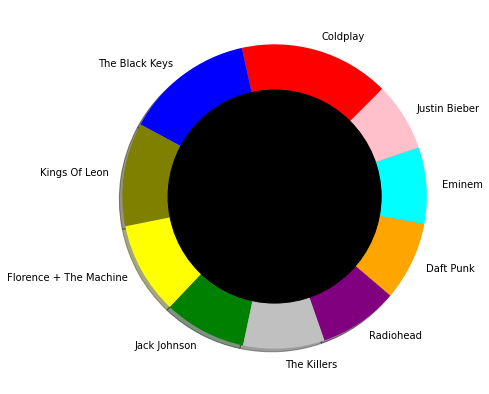

In [18]:
my_circle=plt.Circle( (0,0), 0.7, color='black')
#plt.rcParams['text.color'] = 'white'
explode=0,0,0,0,0,0,0,0,0,0.1
colors = ['Red','Blue','Olive','Yellow','Green','Silver','Purple','Orange','Cyan','Pink']
fig = plt.figure(figsize =(10, 7))
plt.pie(x,labels = y,colors=colors,autopct='%1.1f%%',shadow=True, startangle=45)
#plt.axis('off')
#plt.margins(False)
#ax1 = plt.plot()

p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
#plt.show()

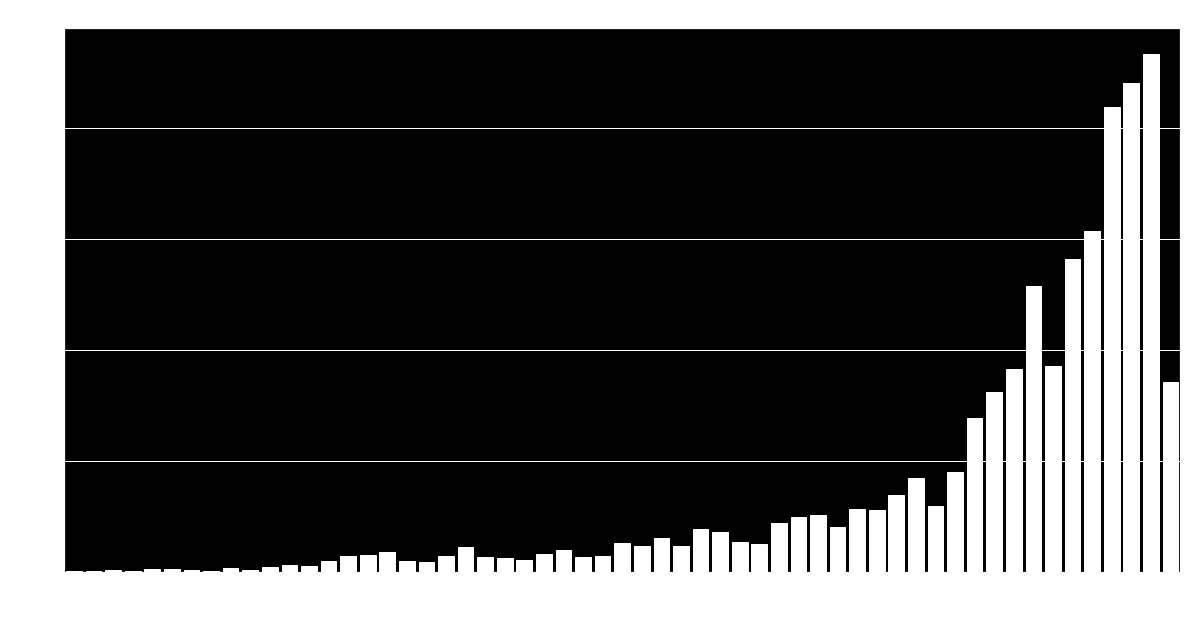

In [19]:
plt.figure(figsize=(20, 10))
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
sns.countplot(x='year', data=df[-(df['year']==0)], color="white")
plt.xticks(rotation=90, color="white")
plt.yticks(color="white")
plt.title("No. of Songs per Year", fontsize=20, color="white")
plt.xlabel("Year", fontsize=20, color="white")
plt.ylabel("Count", fontsize=20, color="white")
plt.show()

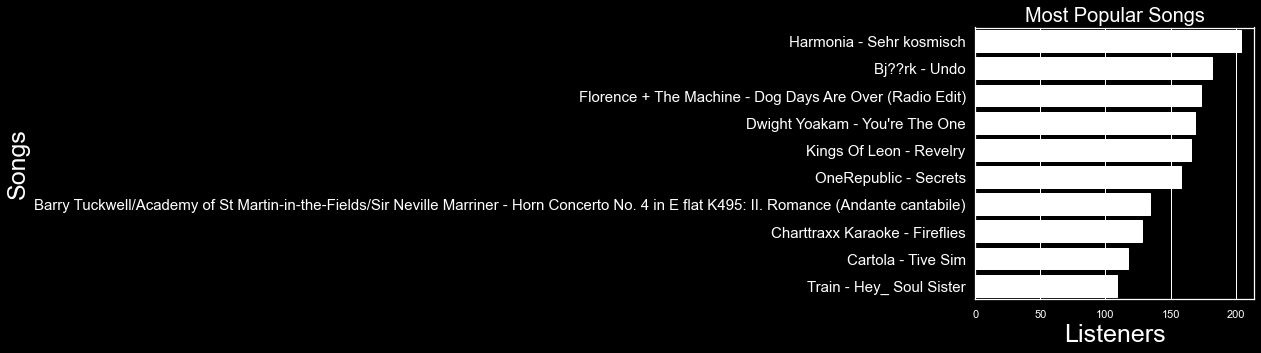

In [20]:
plt.figure(figsize=(5,5))
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
sns.barplot(x = (df['song'].value_counts()[:10].values), y = (df['song'].value_counts()[:10].index), color="white")
plt.title('Most Popular Songs', fontsize=20, color="white")
plt.xlabel('Listeners', fontsize=25, color="white")
plt.xticks(color="white")
plt.ylabel('Songs', fontsize=25, color="white")
plt.yticks(fontsize=15,color="white")
plt.show()

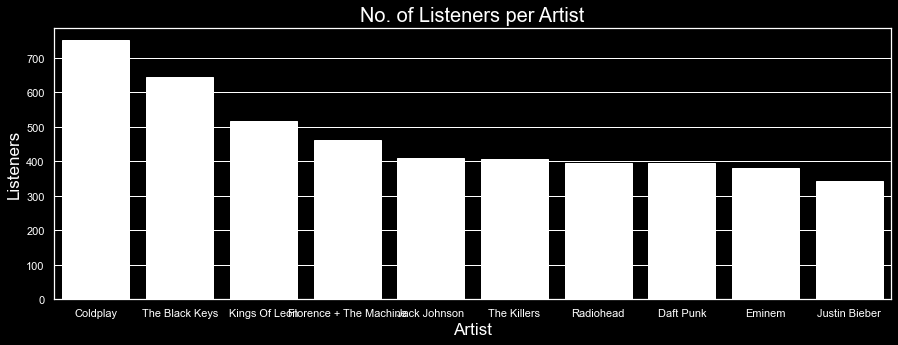

In [21]:
plt.figure(figsize=(15,5))
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})
sns.barplot(x = (df['Artist'].value_counts()[:10].index), y = (df['Artist'].value_counts()[:10].values), color="white")
plt.title('No. of Listeners per Artist', fontsize=20,color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.xlabel('Artist', fontsize=17,color="white")
plt.ylabel('Listeners', fontsize=17,color="white")
plt.show()

In [22]:
class Engine():
    def __init__(self, data, user_id, song):
        self.data = data
        self.user_id = user_id
        self.song = song
        self.glcm = None
        
    def get_song_history(self, user):
        user_data = self.data[self.data[self.user_id] == user]
        return list(user_data[self.song].unique())
        
    def get_users(self, item):
        item_data = self.data[self.data[self.song] == item]
        return set(item_data[self.user_id].unique())
        
    def get_all_songs(self):
        return list(self.data[self.song].unique())
        
    def get_glcm(self, user_songs, all_songs):
        users = []        
        for i in range(0, len(user_songs)):
            users.append(self.get_users(user_songs[i]))   
        glcm = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)

        for i in range(0,len(all_songs)):
            songs_i_data = self.data[self.data[self.song] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):           
                users_j = users[j]
                users_intersection = users_i.intersection(users_j)
               
                users_union = users_i.union(users_j)
                glcm[j,i] = float(len(users_intersection))/float(len(users_union))

        return glcm

    def generate_recommendations(self, user, glcm, all_songs, user_songs):
        sim_scores = glcm.sum(axis=0)/float(glcm.shape[0])
        sim_scores = np.array(sim_scores)[0].tolist()
 
        sort_index = sorted(((e,i) for i,e in enumerate(list(sim_scores))), reverse=True)
        columns = ['UserID', 'Song', 'Score', 'Rank']
        df = pd.DataFrame(columns=columns)
         
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        print("Music Recommendations: \n")
        return df.drop(['UserID'], axis=1)

    def get_recommendations(self, user):
        user_songs = self.get_song_history(user)    
        all_songs = self.get_all_songs()
        glcm = self.get_glcm(user_songs, all_songs)
        return self.generate_recommendations(user, glcm, all_songs, user_songs)

    def get_similar_songs(self, item_list):
        user_songs = item_list
        all_songs = self.get_all_songs()
        glcm = self.get_glcm(user_songs, all_songs)
        return self.generate_recommendations("", glcm, all_songs, user_songs)

In [23]:
eng = Engine(df, 'user_id', 'song')
song_history = eng.get_song_history(df['user_id'][1001])

In [24]:
print("User Song History: \n")
for song in song_history:
  print(song)

User Song History: 

Muse - Uprising
Weezer - No One Else
Yeah Yeah Yeahs - Runaway
The Killers - Losing Touch
The Rural Alberta Advantage - Don't Haunt This Place
Florence + The Machine - Dog Days Are Over (Radio Edit)
Bright Eyes - At The Bottom Of Everything
Jason Mraz & Colbie Caillat - Lucky (Album Version)
Weezer - Island In The Sun
Tiny Vipers - They Might Follow You
Fleet Foxes - Innocent Son
Linkin Park - Bleed It Out [Live At Milton Keynes]
Frightened Rabbit - Yawns
Weezer - El Scorcho
Coldplay - Clocks
Adam Lambert - Whataya Want From Me
Justin Bieber - Somebody To Love
Katy Perry - Waking Up In Vegas (Calvin Harris Remix Edit)
Emmy The Great - Mia
Weezer - My Name Is Jonas
Darwin Deez - Radar Detector
Rihanna - Rehab
Camera Obscura - Teenager
Lily Allen - Not Big
Timbaland / Justin Timberlake / Nelly Furtado - Give It To Me
The New Pornographers - Falling Through Your Clothes
Ray LaMontagne - Trouble (Album Version)
Yeah Yeah Yeahs - Soft Shock
Bright Eyes - Old Soul Song
D

In [25]:
eng.get_recommendations(df['user_id'][1001])

Music Recommendations: 



,Song,Score,Rank
0,Usher featuring will.i.am - OMG,0.045576,1
1,Kid Cudi / MGMT / Ratatat - Pursuit Of Happine...,0.045071,2
2,Beyonc?? - Halo,0.043027,3
3,Paramore - The Only Exception (Album Version),0.042851,4
4,Train - Hey_ Soul Sister,0.042728,5
5,OneRepublic - Secrets,0.042554,6
6,Florence + The Machine - Cosmic Love,0.041469,7
7,The Script - Breakeven,0.038114,8
8,La Roux - Bulletproof,0.037494,9
9,Linkin Park - In The End (Album Version),0.037255,10


In [29]:
a = input("Enter song name:")

Enter song name:La Roux - Bulletproof


In [31]:
eng.get_similar_songs(a)

Music Recommendations: 



,Song,Score,Rank
0,iio - Rapture,0.0,1
1,Wamdue Project - King Of My Castle [Nicola Fas...,0.0,2
2,Delegation - One More Step To Take,0.0,3
3,Jill Scott - How It Makes You Feel,0.0,4
4,Caparezza - Fuori Dal Tunnel (Album Version),0.0,5
5,Robin Thicke / Lil Wayne - Shooter,0.0,6
6,Jeremih - Break Up To Make Up,0.0,7
7,Dustin O'Halloran - Opus No. 12,0.0,8
8,Alter Bridge - Watch Over You,0.0,9
9,Flyleaf - Arise,0.0,10
